In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [56]:
data = pd.read_csv('Mall_Customers.csv')
data.rename(columns={'CustomerID': 'CSI', 'Gender': 'GN','Age' : 'AG', 'Annual Income (k$)' : 'AI' ,'Spending Score (1-100)' : 'SS' }, inplace=True)

In [64]:
data.head()

,CSI,GN,AG,AI,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [69]:
X = data[['Spending Score (1-100)']].values


In [70]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [71]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

c:\Users\Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\skle

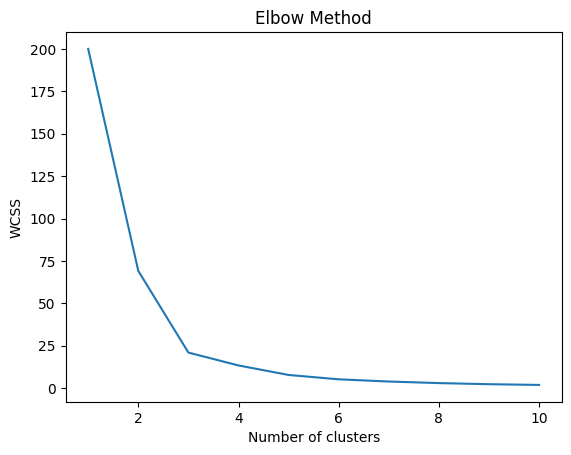

In [72]:
plt.scatter(X,)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [74]:
k = 3  # You can change this to your desired number of clusters
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(X)
data['cluster'] = kmeans.labels_
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
data['cluster_center'] = cluster_centers[data['cluster']]
print(data)


     CSI      GN  AG   AI  Spending Score (1-100)  cluster  cluster_center
0      1    Male  19   15                      39        1       48.180851
1      2    Male  21   15                      81        0       81.779661
2      3  Female  20   16                       6        2       14.595745
3      4  Female  23   16                      77        0       81.779661
4      5  Female  31   17                      40        1       48.180851
..   ...     ...  ..  ...                     ...      ...             ...
195  196  Female  35  120                      79        0       81.779661
196  197  Female  45  126                      28        2       14.595745
197  198    Male  32  126                      74        0       81.779661
198  199    Male  32  137                      18        2       14.595745
199  200    Male  30  137                      83        0       81.779661

[200 rows x 7 columns]


c:\Users\Student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


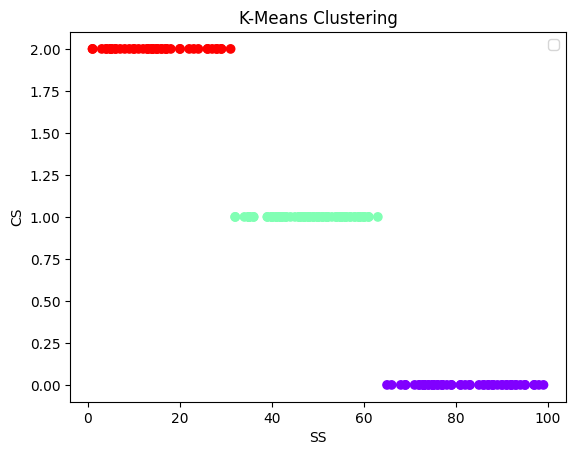

In [77]:
plt.scatter(data['Spending Score (1-100)'], data['cluster'], c=data['cluster'], cmap='rainbow')
plt.xlabel('SS')
plt.ylabel('CS')
plt.title('K-Means Clustering')
plt.legend()
plt.show()